# **CLASIFICACIÓN MULTIPLE - POPULARIDAD**

**Integrantes de equipo:**
* Julio César Choquehuayta Quenta  2018-119025
* Carlos Enrique Yufra Loza		     2019-119051
* Pablo Moisés Aro Galindo		     2019-119034
* Carlos Manuel Azañero Otoya	     2015-119026
* Jose Angel Castro Caceres		     2017-119054


## DESCRIPCION DEL PROBLEMA

La industria de la música es bastante popular en la actualidad, lo que escuchan las personas cambia con el tiempo, ya sea por tendencias o moda, mucho de lo que determina su popularidad suele ser subjetivo o circunstancial. Sin embargo tomando en cuenta datos técnicos o variables presentes en la musica, se tendrá como objetivo el determinar si es popular o no.

Este proyecto se enfocará en un problema de clasificacion múltiple, el cual hara uso de una dataset de Spotify de pistas en un rango de 125 géneros diferentes. Cada pista tiene algunas funciones de audio asociadas. Los datos están en formato CSV, que es tabular y se puede cargar rápidamente.

Link del Dataset: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset?resource=download

## ANALISIS EXPLORATORIO

Primero, nosotros necesitamos tener la dataset descargada y almacenada en una carpeta en drive para su próximo uso, ademas de importar las librerías necesarias.

In [22]:
import numpy as np
import pandas as pd
from keras import layers,models, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

Nosotros cargamos la dataset usando pandas read_csv, junto con el link de donde esta nuestra data en drive

In [8]:
# Obtenemos el dataset de las Canciones de Spotify y lo almacenamos en un DataFrame
df = pd.read_csv("https://drive.google.com/uc?id=1gAkvuBkYAEKCdf9CYqePni8TacqkwWt3")
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


Exploramos un poco la dataframe a usar, usando algunas sentencias para visualizar mejor las columnas, tipos de datos y datos únicos


In [9]:
# Visualizamos las primeras 12 columnas
df.iloc[:,:12]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681
...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889


In [10]:
# Visualizamos el resto de columnas
df.iloc[:,12:]

,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...
113995,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [11]:
# Visualizamos el tipo de dato de columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Cuando se hace el llamado a df.info, este imprimira la siguiente informacion:


*   El numero de filas y columnas en la dataframe
*   El nombre de cada columna, su tipo de dato, y el numero de non-null values en la columna
*   El numero total de non.null values en la dataframe
*   La memoria de uso en la dataframe





In [12]:
# number of unique values in our data set.
df.nunique()

Unnamed: 0          114000
track_id             89741
artists              31437
album_name           46589
track_name           73608
popularity             101
duration_ms          50697
explicit                 2
danceability          1174
energy                2083
key                     12
loudness             19480
mode                     2
speechiness           1489
acousticness          5061
instrumentalness      5346
liveness              1722
valence               1790
tempo                45653
time_signature           5
track_genre            114
dtype: int64

## PRE-PROCESAMIENTO DE LOS DATOS

In [13]:
# Convertimos la columna 'popularity' en 'popularity_class'(0:baja, 1:media, 2:alta)
df['popularity_class'] = 0
df.loc[df['popularity'] > 30, 'popularity_class'] = 1
df.loc[df['popularity'] > 70, 'popularity_class'] = 2

In [14]:
# Extraemos una muestra de 100 000 registros aleatorios
df_sample = df.sample(100000)

# Filtramos las entradas y la salida que usaremos para el modelo
columns = ['danceability','energy','loudness','speechiness','acousticness','instrumentalness','valence','tempo','popularity_class']
df_columns = df_sample[columns]
df_columns.nunique() # visualizamos la cantidad de valores únicos de las columnas

danceability         1146
energy               2028
loudness            18771
speechiness          1475
acousticness         4987
instrumentalness     5322
valence              1766
tempo               42506
popularity_class        3
dtype: int64

In [33]:
# Visualizamos algunos registros filtrados por el valor de 'popularity_class'
df_columns.query('popularity_class == 2')

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,popularity_class
106005,0.713,0.452,-9.638,0.0295,0.841000,0.003800,0.235,102.963,2
91518,0.338,0.340,-12.049,0.0339,0.580000,0.003200,0.197,82.433,2
99936,0.587,0.767,-5.713,0.0449,0.225000,0.000000,0.664,100.380,2
99301,0.632,0.349,-10.289,0.0346,0.926000,0.000075,0.307,109.981,2
30258,0.687,0.785,-4.650,0.0333,0.327000,0.000000,0.655,106.046,2
...,...,...,...,...,...,...,...,...,...
99640,0.495,0.326,-12.290,0.0365,0.541000,0.000088,0.371,136.243,2
2260,0.618,0.938,-3.442,0.0456,0.017900,0.000000,0.875,91.455,2
62171,0.563,0.901,-3.926,0.1100,0.000382,0.000005,0.684,145.004,2
68760,0.712,0.557,-4.861,0.1150,0.039700,0.000000,0.594,170.079,2


In [16]:
# Visualizamos algunas estadísticas de nuestros datos
df_columns.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,popularity_class
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.566870,0.641210,-8.265175,0.084553,0.315162,0.156101,0.473844,122.092688,0.589560
std,0.173493,0.251575,5.028899,0.105449,0.332646,0.309659,0.259051,29.965280,0.572278
min,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.456000,0.472000,-10.019000,0.035900,0.017000,0.000000,0.260000,99.222000,0.000000
50%,0.580000,0.685000,-7.013000,0.048900,0.169000,0.000041,0.464000,122.008000,1.000000
75%,0.694000,0.853000,-5.010000,0.084500,0.598000,0.049000,0.683000,140.066250,1.000000
max,0.985000,1.000000,4.532000,0.965000,0.996000,1.000000,0.995000,243.372000,2.000000


In [17]:
# Pasamos los datos del DF a un arreglo
data = df_columns.values

# Separamos las características de las etiquetas
x_data = data[:, :-1]
y_data = data[:, -1]

print("X:")
print(x_data)
print("y:")
print(y_data)

X:
[[ 7.68000e-02  1.31000e-01 -2.31530e+01 ...  7.97000e-01  3.56000e-02
   8.07650e+01]
 [ 3.73000e-01  8.57000e-01 -3.54600e+00 ...  1.38000e-03  2.35000e-01
   1.37084e+02]
 [ 7.37000e-01  7.05000e-01 -6.23100e+00 ...  0.00000e+00  5.57000e-01
   8.64010e+01]
 ...
 [ 6.29000e-01  8.37000e-01 -5.67700e+00 ...  4.39000e-01  7.72000e-01
   1.25013e+02]
 [ 2.78000e-01  1.94000e-01 -1.77770e+01 ...  9.20000e-01  2.21000e-01
   6.93680e+01]
 [ 7.20000e-01  7.38000e-01 -1.10840e+01 ...  9.27000e-01  5.48000e-01
   9.59950e+01]]
y:
[0. 1. 0. ... 0. 1. 0.]


In [18]:
# Verificamos las dimensiones de los arreglos
print("X:")
print(x_data.shape)
print("y:")
print(y_data.shape)

X:
(100000, 8)
y:
(100000,)


In [19]:
# Obtenemos la media y la desviación estándar de cada característica
x_mean = x_data.mean(axis = 0)
x_std = x_data.std(axis = 0)

# Normalizamos las características del modelo y convertimos a float32
x_data = (x_data - x_mean) / x_std
x_data= x_data.astype(np.float32)

# Verificamos los datos normalizados
x_data

array([[-2.82474   , -2.0280714 , -2.960469  , ...,  2.0697055 ,
        -1.6917396 , -1.3791927 ],
       [-1.1174587 ,  0.8577615 ,  0.93841594, ..., -0.49965143,
        -0.92200196,  0.5002919 ],
       [ 0.9806183 ,  0.2535651 ,  0.40449914, ..., -0.50410795,
         0.32100457, -1.1911074 ],
       ...,
       [ 0.35811195,  0.77826196,  0.514663  , ...,  0.9135886 ,
         1.1509624 ,  0.097457  ],
       [-1.6650337 , -1.7776479 , -1.8914424 , ...,  2.466919  ,
        -0.9760457 , -1.7595347 ],
       [ 0.8826312 ,  0.3847393 , -0.5605281 , ...,  2.4895246 ,
         0.28626215, -0.87093526]], dtype=float32)

## DISEÑO DE LA ARQUITECTURA Y ENTRENAMIENTO DEL MODELO DE RED NEURONAL MULTICAPA

In [20]:
# Separamos aleatoriamente los datos de entrenamiento(80%) y de prueba(20%)
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=20)

In [25]:
# Definimos el modelo
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(8,)))
model.add(layers.Dropout(0.125))
model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dropout(0.125))
model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dropout(0.125))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compilamos el modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

# Entrenamos el modelo
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=1024)

Epoch 1/100
63/63 [==============================] - 7s 9ms/step - loss: 0.8106 - accuracy: 0.5669 - val_loss: 0.7866 - val_accuracy: 0.5888
Epoch 2/100
63/63 [==============================] - 0s 6ms/step - loss: 0.7807 - accuracy: 0.5975 - val_loss: 0.7781 - val_accuracy: 0.5948
Epoch 3/100
63/63 [==============================] - 0s 5ms/step - loss: 0.7740 - accuracy: 0.6022 - val_loss: 0.7723 - val_accuracy: 0.6026
Epoch 4/100
63/63 [==============================] - 0s 5ms/step - loss: 0.7673 - accuracy: 0.6093 - val_loss: 0.7720 - val_accuracy: 0.6055
Epoch 5/100
63/63 [==============================] - 0s 5ms/step - loss: 0.7644 - accuracy: 0.6107 - val_loss: 0.7727 - val_accuracy: 0.6045
Epoch 6/100
63/63 [==============================] - 0s 5ms/step - loss: 0.7616 - accuracy: 0.6143 - val_loss: 0.7663 - val_accuracy: 0.6102
Epoch 7/100
63/63 [==============================] - 0s 5ms/step - loss: 0.7593 - accuracy: 0.6166 - val_loss: 0.7687 - val_accuracy: 0.6058
Epoch 8/100
6

## EVALUACIÓN Y METRICAS

In [26]:
# Guardamos los datos del entrenamiento
history_dict = history.history
history_dict

{'loss': [0.8106409311294556,
  0.7807096242904663,
  0.7740267515182495,
  0.7672975659370422,
  0.7644276022911072,
  0.7615954875946045,
  0.7592852711677551,
  0.7559478282928467,
  0.7505859136581421,
  0.7482699155807495,
  0.7450642585754395,
  0.7412549257278442,
  0.7380670309066772,
  0.7323940396308899,
  0.7274476885795593,
  0.7239373326301575,
  0.7166249752044678,
  0.7107647061347961,
  0.7048066258430481,
  0.6987134218215942,
  0.6930309534072876,
  0.6877060532569885,
  0.6782357692718506,
  0.6720841526985168,
  0.6627695560455322,
  0.6551254987716675,
  0.6478303074836731,
  0.6403312087059021,
  0.630292534828186,
  0.6210433840751648,
  0.6148096919059753,
  0.603674054145813,
  0.5933489799499512,
  0.5869477391242981,
  0.5766887664794922,
  0.5699368119239807,
  0.5591558218002319,
  0.5487788319587708,
  0.5385098457336426,
  0.5307345986366272,
  0.5214821696281433,
  0.5112266540527344,
  0.5007356405258179,
  0.49112221598625183,
  0.4860711395740509,
  0

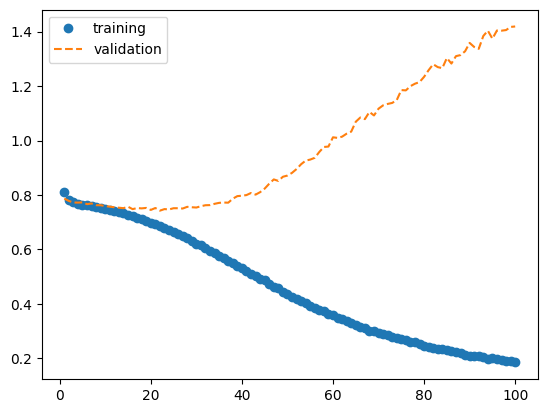

In [27]:
# Guardamos los valores de perdida en dos arreglos para entrenamiento y validacion
i=0
loss_values = history_dict["loss"][i:]
val_loss_values = history_dict["val_loss"][i:]

# Graficamos los valores de perdida
epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, loss_values, 'o', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

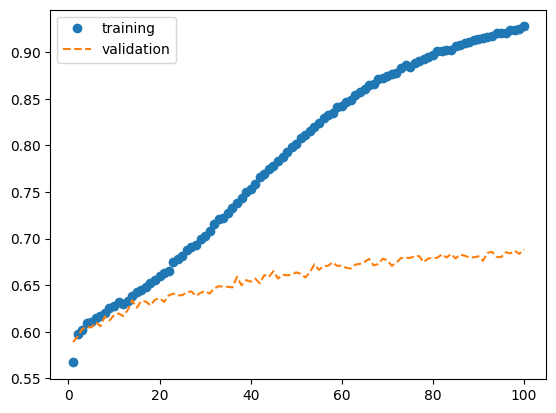

In [28]:
# Guardamos los valores de precisión en dos arreglos para entrenamiento y validacion
i=0
loss_values = history_dict["accuracy"][i:]
val_loss_values = history_dict["val_accuracy"][i:]

# Graficamos los valores de precisión
epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, loss_values, 'o', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

In [29]:
# evaluamos el modelo
model.evaluate(X_test, y_test)

625/625 [==============================] - 2s 2ms/step - loss: 1.4347 - accuracy: 0.6849


[1.4346693754196167, 0.6849499940872192]

In [30]:
# Predecimos en base a los datos de prueba
y_predict_prob = model.predict(X_test)

# Convertimos las probabilidades en clases
y_predict = np.argmax(y_predict_prob, axis=1)

625/625 [==============================] - 1s 2ms/step


In [34]:
y_predict_prob

array([[9.4015235e-01, 5.8574248e-02, 1.2733884e-03],
       [2.8551903e-01, 7.0787954e-01, 6.6014226e-03],
       [9.5051593e-01, 4.9483873e-02, 1.8077527e-07],
       ...,
       [1.4084031e-01, 8.0928218e-01, 4.9877524e-02],
       [7.8382927e-01, 2.1617073e-01, 3.4380732e-12],
       [2.4227962e-01, 6.0271271e-02, 6.9744909e-01]], dtype=float32)

In [31]:
# Verificamos algunos casos individuales
pos = 31
print("y: " , y_test[pos])
print("y predict:", y_predict[pos])

y:  1.0
y predict: 1


In [32]:
# Matriz de Confusion
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_predict) * 100))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predict))

Accuracy: 68.49%
Confusion Matrix:
[[6067 2864  194]
 [2526 7226  261]
 [ 224  232  406]]
